In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['figure.figsize'] = (18, 10)
matplotlib.rcParams['font.size'] = 20

In [3]:
import os
import copy
import joblib

from glob import glob
from PIL import Image
from pycocotools import coco
from pprint import pprint

import numpy as np

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
from skimage.transform import resize

In [5]:
from mscocosol.variable import user_settings as sets

In [6]:
from mscocosol.utils.datagen import DataGen

# Data Generator sanity check

In [7]:
data_gen_sets = {
    'annotation_file': sets['annotation']['instances_train'],
    'categories': ['banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake'],
    'batch_size': 4,
    'imgs_dir': sets['imgs']['train'],
    'target_img_size': [225, 225],
    'resize_strategy': 'stretch'
}

In [8]:
gen = DataGen(**data_gen_sets)

loading annotations into memory...
Done (t=13.33s)
creating index...
index created!


In [9]:
len(gen._ann_ids_for_imgs)

16255

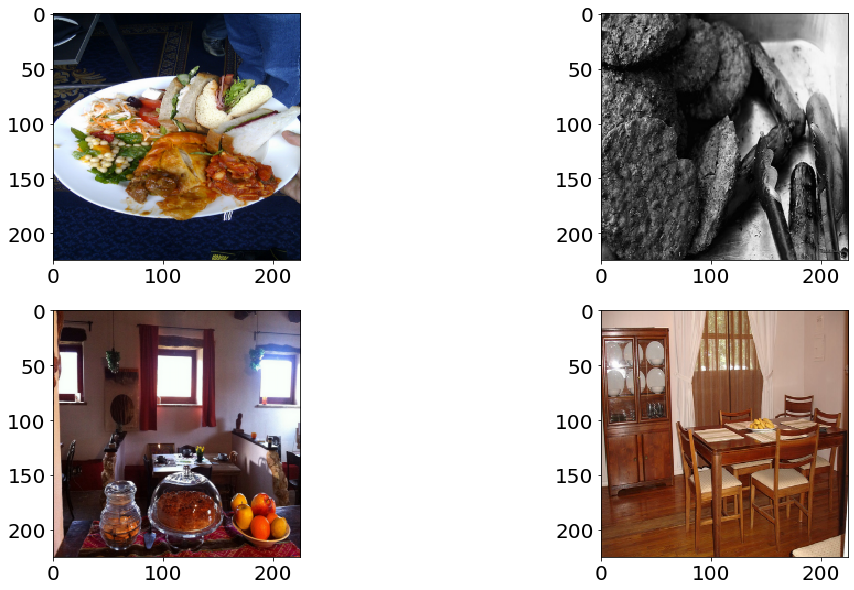

In [10]:
np.random.seed(49895)

imgs, masks = gen.next_batch()

fig, axes = plt.subplots(2, 2)
for ax, img in zip(axes.flatten(), imgs):
    ax.imshow(img)

plt.show()

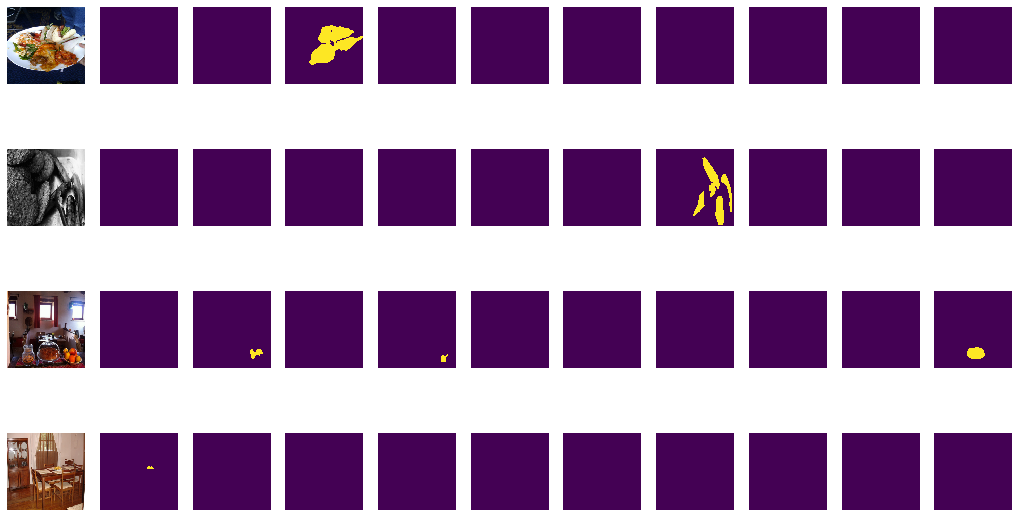

In [11]:
np.random.seed(49895)

imgs, masks = gen.next_batch()

fig, axes = plt.subplots(4, 11)

s = 0

for i in range(gen._batch_size):
    axes[i, 0].axis('off')
    axes[i, 0].imshow(imgs[i])
    s+=1
    
    for j in range(10):
        axes[i, j + 1].axis('off')
        axes[i, j + 1].imshow(masks[i][:, :, j])
        s+=1

plt.show()

In [12]:
type(imgs), type(masks)

(numpy.ndarray, numpy.ndarray)

In [13]:
np.shape(imgs), np.shape(masks)

((4, 225, 225, 3), (4, 225, 225, 10))

In [14]:
len(masks)

4

In [15]:
imgs[0].shape

(225, 225, 3)

In [16]:
masks[0].shape

(225, 225, 10)